In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

# Set plot style
sns.set(style="whitegrid")

# Load cleaned HR dataset
df = pd.read_csv("../data/cleaned_hr_data.csv")
df.head()


,employee_id,gender,age,state_of_origin,department,salary,job_level,performance_score,tenure_years,exit_status,feedback_text
0,E001,Male,29,Karnataka,Engineering,820000,L4,Exceeds Expectations,3,Active,Work is good but promotions are slow.
1,E002,Female,35,Delhi,Marketing,750000,L5,Meets Expectations,5,Active,Often feel unheard in discussions.
2,E003,Male,41,Bihar,Finance,900000,L6,Below Expectations,8,Exited,Lack of regional representation at higher levels.
3,E004,Non-binary,28,Telangana,Engineering,850000,L4,Meets Expectations,4,Active,Mentorship programs are helpful.
4,E005,Female,32,West Bengal,HR,780000,L5,Exceeds Expectations,6,Exited,Performance reviews felt biased.


In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   employee_id        50 non-null     object
 1   gender             50 non-null     object
 2   age                50 non-null     int64 
 3   state_of_origin    50 non-null     object
 4   department         50 non-null     object
 5   salary             50 non-null     int64 
 6   job_level          50 non-null     object
 7   performance_score  50 non-null     object
 8   tenure_years       50 non-null     int64 
 9   exit_status        50 non-null     object
 10  feedback_text      50 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.4+ KB


employee_id          0
gender               0
age                  0
state_of_origin      0
department           0
salary               0
job_level            0
performance_score    0
tenure_years         0
exit_status          0
feedback_text        0
dtype: int64

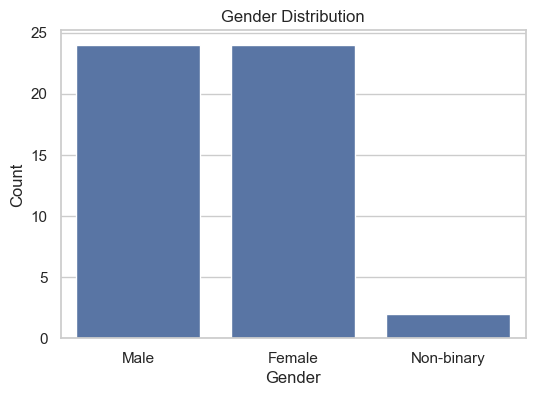

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


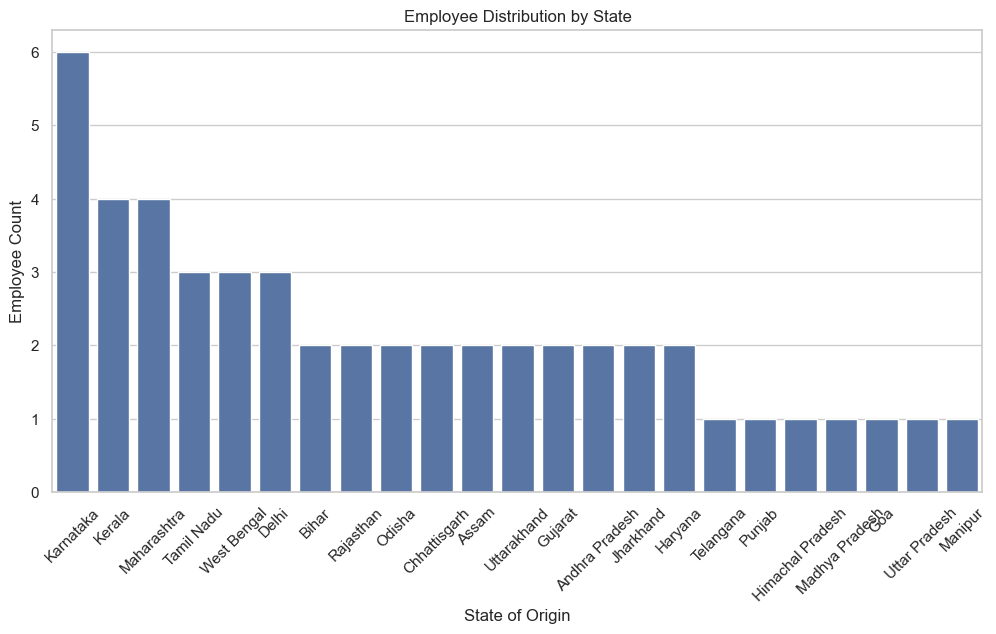

In [5]:

plt.figure(figsize=(12,6))
state_order = df['state_of_origin'].value_counts().index
sns.countplot(data=df, x='state_of_origin', order=state_order)
plt.xticks(rotation=45)
plt.title("Employee Distribution by State")
plt.xlabel("State of Origin")
plt.ylabel("Employee Count")
plt.show()


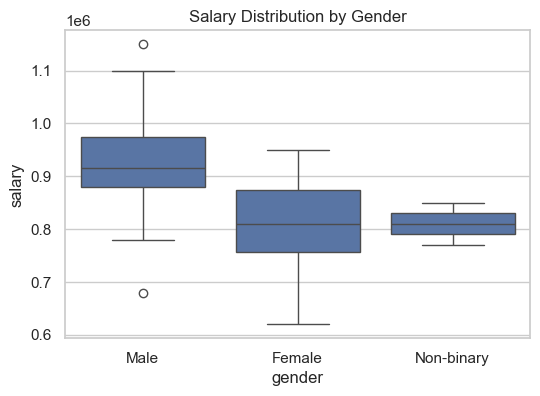

In [7]:
#salary by gender
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='gender', y='salary')
plt.title("Salary Distribution by Gender")
plt.show()


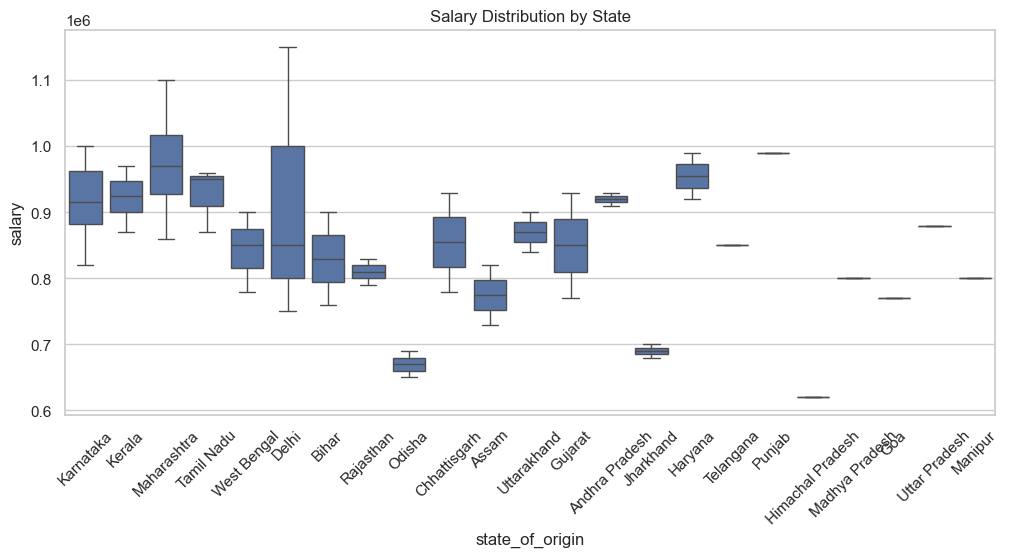

In [8]:
#salary by state
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='state_of_origin', y='salary', order=state_order)
plt.xticks(rotation=45)
plt.title("Salary Distribution by State")
plt.show()


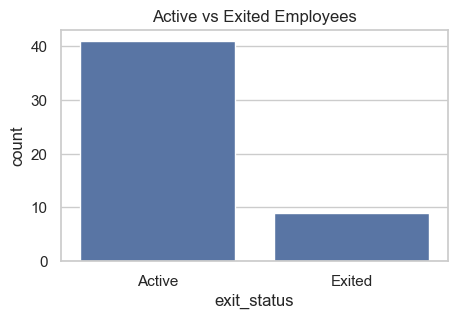

In [9]:
#attrition(exit status)
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='exit_status')
plt.title("Active vs Exited Employees")
plt.show()


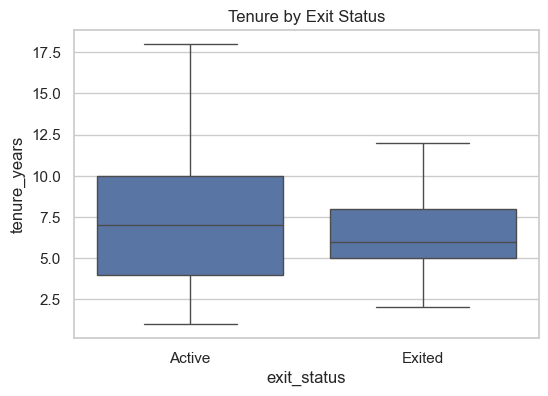

In [10]:
#tenure by exit status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='exit_status', y='tenure_years')
plt.title("Tenure by Exit Status")
plt.show()


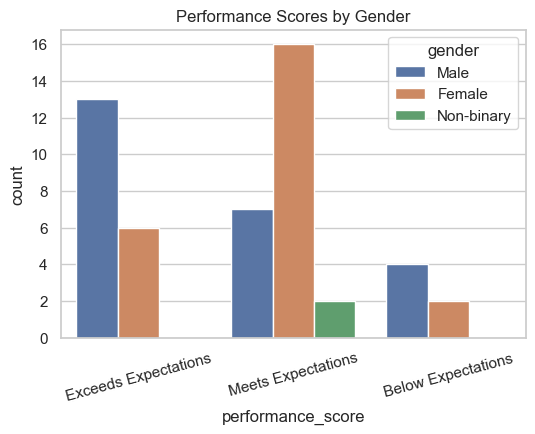

In [12]:
#performance rating by gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='performance_score', hue='gender')
plt.title("Performance Scores by Gender")
plt.xticks(rotation=15)
plt.show()


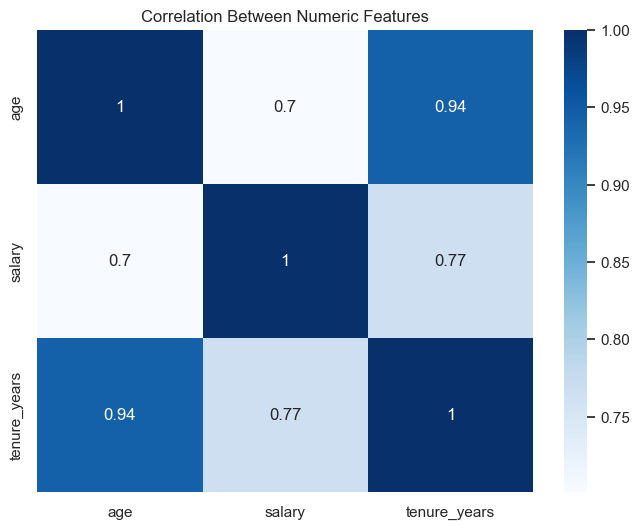

In [13]:
#numeric feature correlation
plt.figure(figsize=(8,6))
sns.heatmap(df[['age', 'salary', 'tenure_years']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Numeric Features")
plt.show()


In [14]:
summary = {
    'gender_counts': df['gender'].value_counts(),
    'state_counts': df['state_of_origin'].value_counts(),
    'avg_salary_by_gender': df.groupby('gender')['salary'].mean(),
    'avg_salary_by_state': df.groupby('state_of_origin')['salary'].mean(),
    'attrition_rate': df['exit_status'].value_counts(normalize=True) * 100,
}

for key, value in summary.items():
    value.to_csv(f"../reports/{key}.csv")
